<a href="https://colab.research.google.com/github/itsdivya1309/Machine-Learning/blob/main/NYC_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## Downloading the dataset

In [2]:
! kaggle datasets download dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 151MB/s]


In [3]:
! unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


## Importing the required libraries and data

## Possible questions o answer

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
print('Numpy version:     ',np.__version__)
print('Pandas version:    ',pd.__version__)
print('Matplotlib version:',mpl.__version__)
print('Seaborn version:   ',sns.__version__)

Numpy version:      1.25.2
Pandas version:     2.0.3
Matplotlib version: 3.7.1
Seaborn version:    0.13.1


In [6]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Exploratory Data Analysis

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.shape

(48895, 16)

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
len(df['id'].value_counts())

48895

In [11]:
print(df['name'].value_counts())
print(len(df['name'].value_counts()))

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64
47905


In [12]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [13]:
print(df['neighbourhood'].value_counts())
print(len(df['neighbourhood'].value_counts()))

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64
221


In [14]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [15]:
print(df['host_name'].value_counts())
print(len(df['host_name'].value_counts()))

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64
11452


In [16]:
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

In [17]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
# Analysis of missing data in last review and reviews_per_month
# Hypothesis is that when number_of_reviews = 0, the data for these columns is
#not present

review = df[df['number_of_reviews']==0]
print(review.shape)
print(review.isnull().sum())

(10052, 16)
id                                    0
name                                 10
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [20]:
# The column of las_review simply is of no significance for our analysis,
# and for reviews_per_month, the null values can be substituted for 0
# Also, name, host_name are not significant for analysis
df = df.drop(['id','host_name','last_review'], axis=1)
df.shape

(48895, 13)

In [21]:
df['reviews_per_month'].fillna(0, inplace=True)
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [22]:
df.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [23]:
# Host_ids with the most listings
top_hosts = pd.DataFrame(df['host_id'].value_counts().head(10))
top_hosts.reset_index(inplace=True)
top_hosts

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [24]:
df['calculated_host_listings_count'].max()

327

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

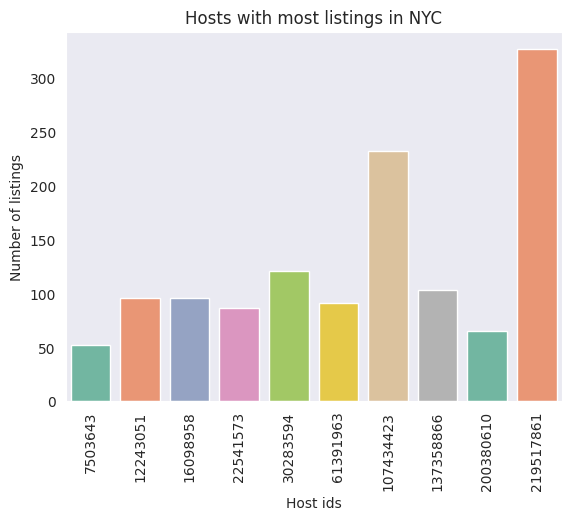

In [25]:
# Let's plot the host ids with the most listings
sns.set_style('dark')

fig, ax = plt.subplots()
sns.barplot(top_hosts, x='host_id', y='count', palette="Set2")
ax.set_xlabel('Host ids')
ax.set_ylabel('Number of listings')
ax.set_title('Hosts with most listings in NYC')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [26]:
# Let's find about the neighbourhood groups
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [37]:
# We would like to know the prices in each of these neighbourhood groups
neighbourhood_data = pd.DataFrame(df.groupby('neighbourhood_group')['price'].mean())
neighbourhood_data['max_price'] = df.groupby('neighbourhood_group')['price'].max()
neighbourhood_data['min_price'] = df.groupby('neighbourhood_group')['price'].min()
neighbourhood_data['25th_quantile'] = df.groupby('neighbourhood_group')['price'].quantile(0.25)
neighbourhood_data['median'] = df.groupby('neighbourhood_group')['price'].quantile(0.50)
neighbourhood_data['75th_quantile'] = df.groupby('neighbourhood_group')['price'].quantile(0.75)
neighbourhood_data.T

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
price,87.496792,124.383207,196.875814,99.517649,114.812332
max_price,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000
min_price,0.000000,0.000000,0.000000,10.000000,13.000000
25th_quantile,45.000000,60.000000,95.000000,50.000000,50.000000
median,65.000000,90.000000,150.000000,75.000000,75.000000
75th_quantile,99.000000,150.000000,220.000000,110.000000,110.000000


[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

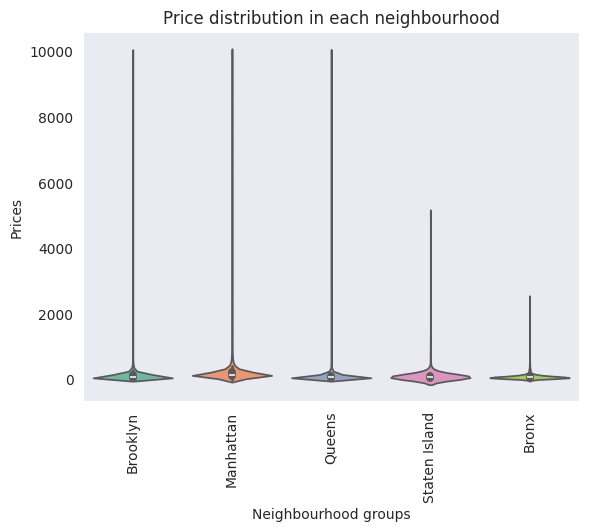

In [39]:
# Let's plot the price for each neighbourhood
sns.set_style('dark')

fig, ax = plt.subplots()
sns.violinplot(data=df, x='neighbourhood_group', y='price', palette="Set2")
ax.set_xlabel('Neighbourhood groups')
ax.set_ylabel('Prices')
ax.set_title('Price distribution in each neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

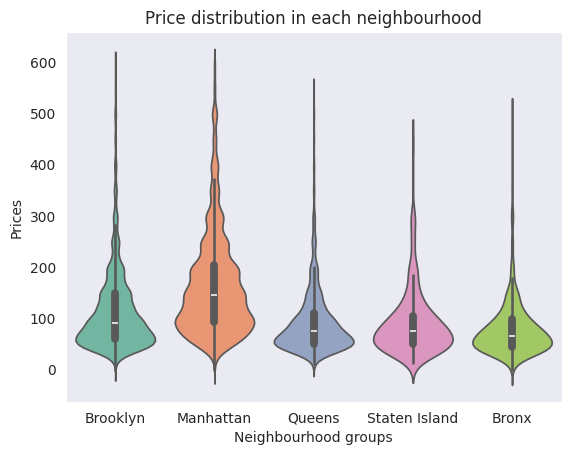

In [46]:
# Because of very high prices in certain neighbourhoods, the plot
# doesn't give relevant information
# hence, we apply a filter on prices
fig, ax = plt.subplots()
sns.violinplot(data=df[df['price']<600], x='neighbourhood_group', y='price', palette="Set2")
ax.set_xlabel('Neighbourhood groups')
ax.set_ylabel('Prices')
ax.set_title('Price distribution in each neighbourhood')
ax.set_xticklabels(ax.get_xticklabels())

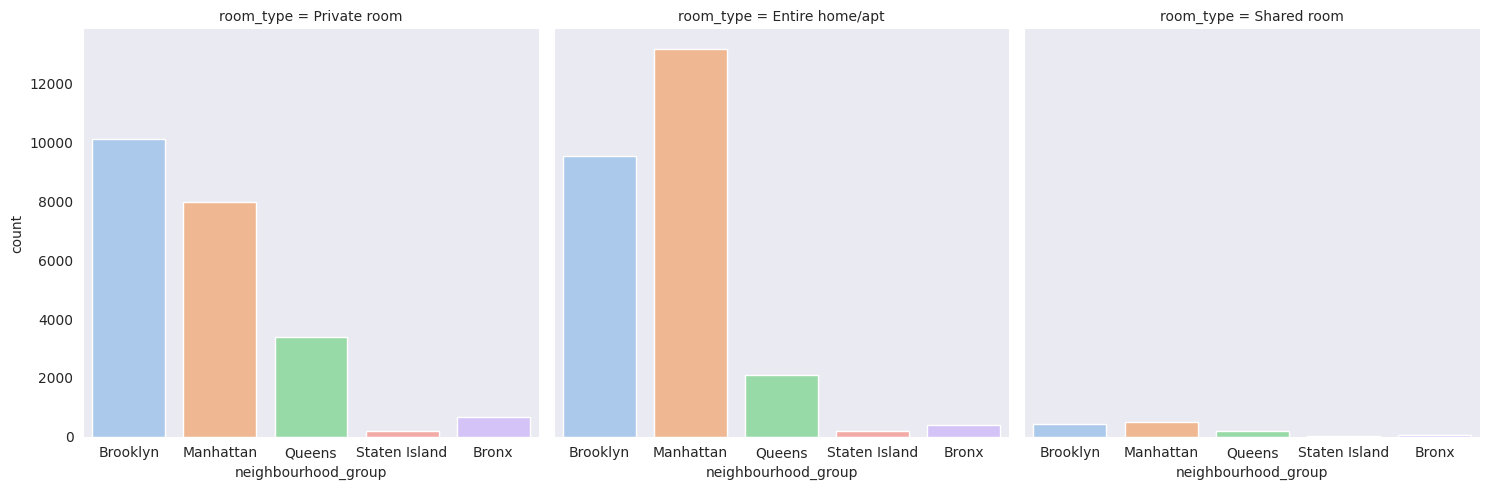

In [89]:
# Neighbourhood groups and the type of rooms available there
viz = sns.catplot(data=df, x='neighbourhood_group', col='room_type',
                  kind='count', palette= 'pastel')

In [66]:
# Findout the most listed neighbourhoods and the types of rooms available there
df['neighbourhood'].value_counts().head(20)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: count, dtype: int64

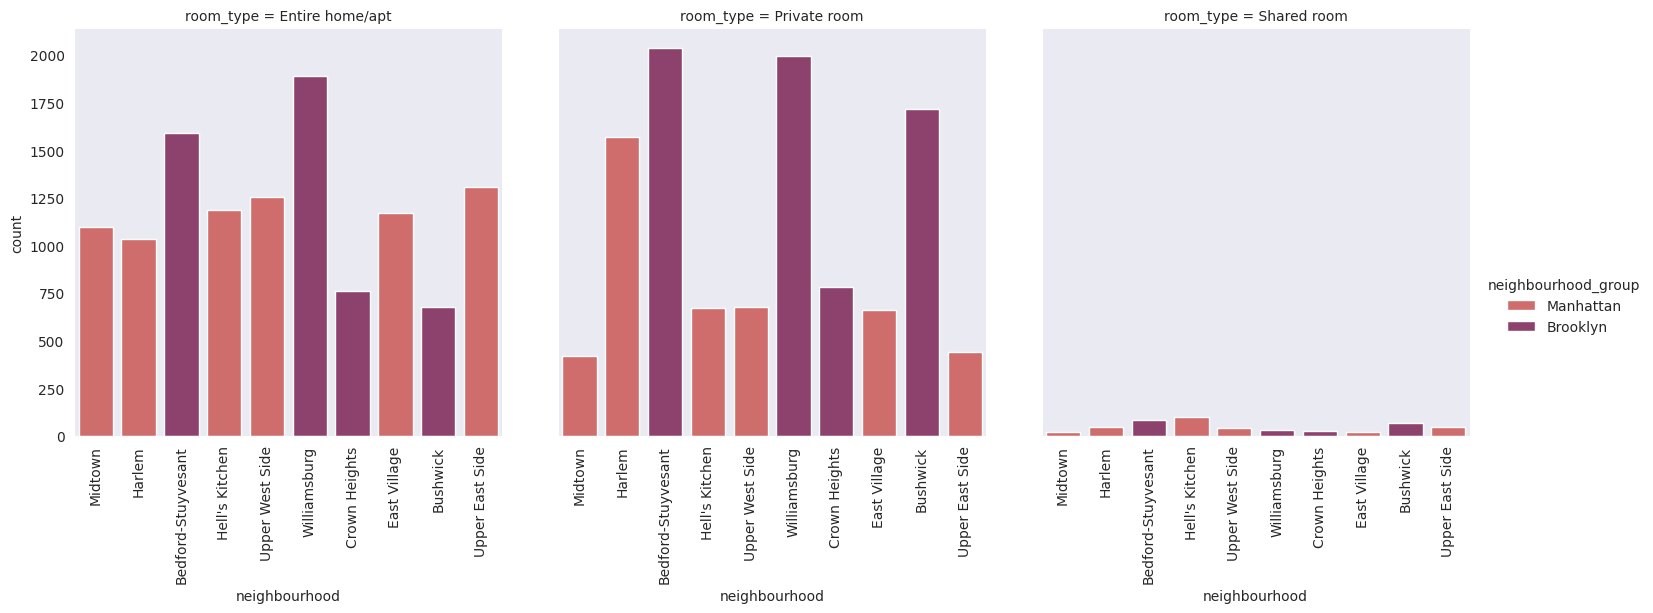

In [86]:
neighbourhood = df.loc[df['neighbourhood'].isin(df['neighbourhood'].value_counts().head(10).index)]
vix = sns.catplot(data=neighbourhood, x='neighbourhood', hue='neighbourhood_group',col='room_type', kind='count', palette="flare")
vix.set_xticklabels(rotation=90)

In [78]:
# Now, let's find out the most listed neighbourhood of Manhattan and the types
# of rooms available there
manhattan = df.loc[df['neighbourhood_group']=='Manhattan']
#Most listed neighbourhood sof Manhattan
manhattan['neighbourhood'].value_counts().head(10)

neighbourhood
Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: count, dtype: int64

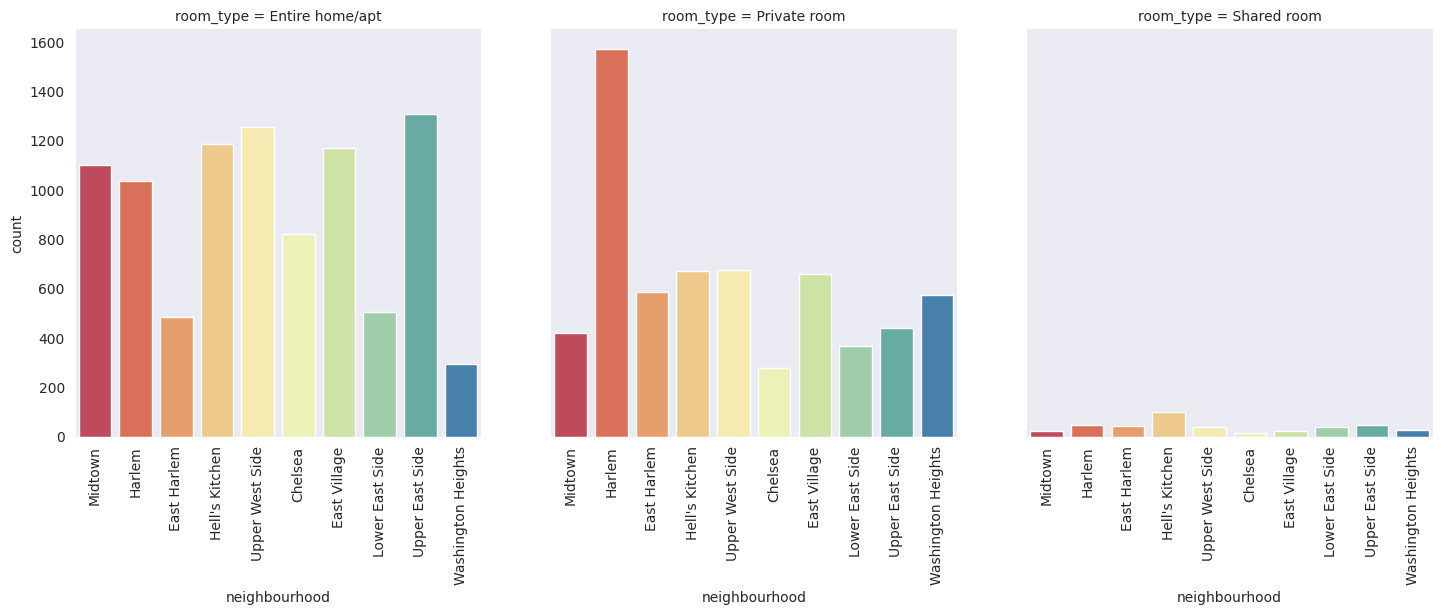

In [85]:
manhattan = manhattan.loc[manhattan['neighbourhood'].isin(manhattan['neighbourhood'].value_counts().head(10).index)]
viz = sns.catplot(data=manhattan, x='neighbourhood',
                  col='room_type', kind='count', palette="Spectral")
viz.set_xticklabels(rotation=90)

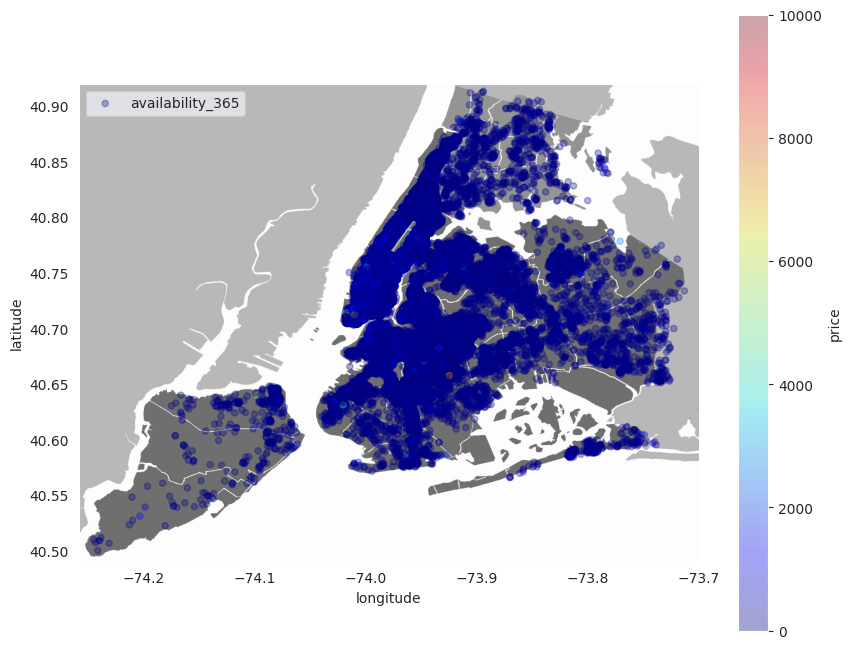

In [102]:
# Plotting the lattitude and longitude
plt.figure(figsize=(10,8))
nyc_img = plt.imread('New_York_City_.jpeg')
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, zorder=5)

plt.legend()
plt.show()